## Reflection Pattern

In [ ]:
%pip install colorama openai pandas python-dotenv matplotlib

### Imports

In [4]:
from openai import OpenAI
from IPython.display import display, Markdown

import os
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [7]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": "Hello, how are you?"}],
)

print(response.choices[0].message.content)

Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


In [9]:
generator_prompts = [
    {
        "role": "system",
        "content": "Data analyst good at visualizing data. Use Python Pandas to generate code to visualize user data. "
        "When provided with critiques, improve the code to make it more efficient and accurate. and response "
        "with a newly revised code based on the critiques improved code."
    }
]

generator_prompts.append({
    "role": "user", 
    "content": """Write me code to visualize this data in a bar chart. Here is the data: {'data': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'column': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}"""
})

In [10]:
generator_response = client.chat.completions.create(
    model="gpt-4o",
    messages=generator_prompts,
)

print(generator_response.choices[0].message.content)

To visualize this data using a bar chart with Python Pandas and Matplotlib, you can follow the code below. This will create a simple bar chart using the data provided:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {'data': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
        'column': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}

# Create DataFrame
df = pd.DataFrame(data)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['column'], df['data'], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Data')
plt.title('Bar Chart of Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
```

In this code, we use `pandas` to structure the data into a DataFrame, and `matplotlib` to generate a bar chart. The `plt.bar()` function is used to create the bar chart, and additional parameters are used to improve the visualization, such as setting figure size, colors, axis labels, and adding grid lines.


In [11]:
agent_code = generator_response.choices[0].message.content

In [12]:
display(Markdown(agent_code))

To visualize this data using a bar chart with Python Pandas and Matplotlib, you can follow the code below. This will create a simple bar chart using the data provided:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {'data': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
        'column': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}

# Create DataFrame
df = pd.DataFrame(data)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['column'], df['data'], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Data')
plt.title('Bar Chart of Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
```

In this code, we use `pandas` to structure the data into a DataFrame, and `matplotlib` to generate a bar chart. The `plt.bar()` function is used to create the bar chart, and additional parameters are used to improve the visualization, such as setting figure size, colors, axis labels, and adding grid lines.

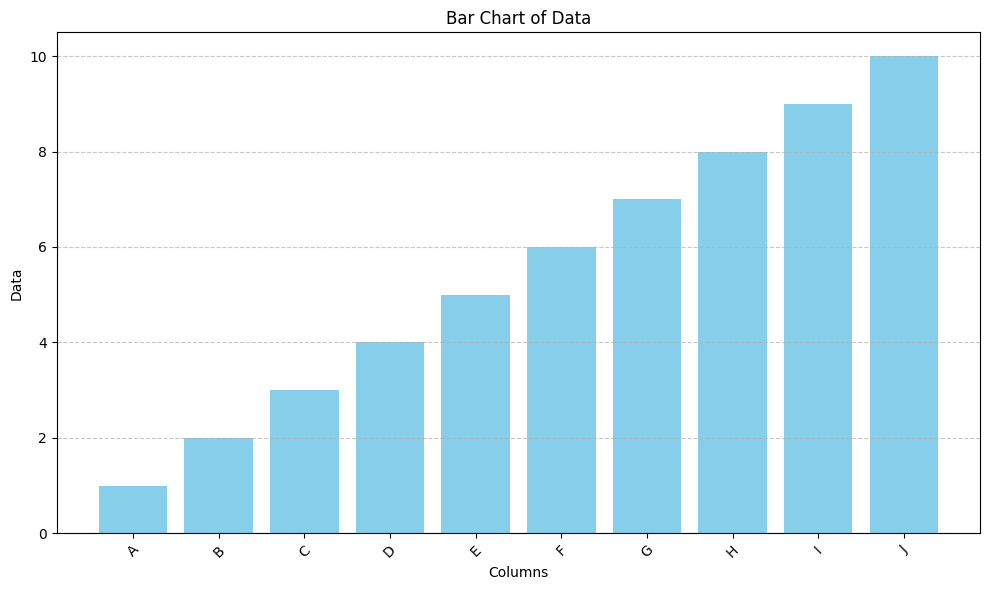

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {'data': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
        'column': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}

# Create DataFrame
df = pd.DataFrame(data)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['column'], df['data'], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Data')
plt.title('Bar Chart of Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Reflection Block

In [14]:
reflection_prompts = [
    {
        "role": "system",
        "content": "You are a senior data analyst. Given the code generated by the generator block, provide feedback to the generator block. "
        "The feedback should be in the form of a critique of the code. The critique should be in the form of a list of improvements that can be made to the code. "
        "The feedback should be in the form of a list of improvements that can be made to the code. "
    }
]

reflection_prompts.append({
    "role": "user", 
    "content": f"""Here is the code generated by the generator block: {agent_code}"""
})

In [15]:
reflection_response = client.chat.completions.create(
    model="gpt-4o",
    messages=reflection_prompts,
)

reflection_feedback = reflection_response.choices[0].message.content
display(Markdown(reflection_feedback))

Here are some improvements that can be made to the code:

1. **Descriptive Variable Names**: 
   - Rename `data['data']` to something more descriptive like `data_values` and `data['column']` to `categories` for better readability.

2. **Documenting the Code**: 
   - Add comments to explain each step in the plotting process to enhance understanding, especially for beginners who may be reading the code.

3. **Use of Pandas Plotting**: 
   - Consider using `pandas` built-in plotting capabilities (e.g., `df.plot.bar(...)`) which can be more concise and provide a seamless integration with DataFrames.

4. **Dynamic Color Palettes**: 
   - Instead of a static color, consider using a colormap from Matplotlib to automatically generate a variety of colors, improving visual aesthetics.

5. **Data Check**: 
   - Include some basic data validation or checks. For example, ensure that the lengths of 'data' and 'column' are equal before proceeding to create the DataFrame.

6. **Handling Larger Datasets**: 
   - If the data size increases, ensure to set parameters for scalability, like dynamic resizing of figure dimensions or more flexible x-ticks rotation based on the number of categories.

7. **Legend Addition**: 
   - Although this particular chart might not need it, for more complex bar charts, including a legend can be necessary for comprehension.

8. **Enhanced Visualization**: 
   - Add annotations on bars to display the exact data values, which can be helpful for precise data interpretation.

9. **Improved Gridlines**:
   - Gridlines could be improved by applying them more thoughtfully or considering other styles to improve the visual appearance without making the chart too busy.

10. **Error Handling**:
    - Introduce basic error handling mechanisms to capture potential issues with data processing and plotting.

These enhancements will lead to cleaner, more robust, and more aesthetically pleasing code and chart outputs.

In [16]:
generator_prompts.append({
    "role": "user", 
    "content": f"""Here is the feedback from the reflection block: {reflection_feedback}"""
})
generator_response = client.chat.completions.create(
    model="gpt-4o",
    messages=generator_prompts,
)

improved_code = generator_response.choices[0].message.content
display(Markdown(improved_code))

Based on the feedback provided, here's an improved version of the code:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Initializing the data
data_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# Basic data validation
if len(data_values) != len(categories):
    raise ValueError("The length of data values and categories must be the same.")

# Creating a DataFrame
df = pd.DataFrame({'Category': categories, 'Values': data_values})

# Documenting: Setting up the plot
plt.figure(figsize=(10, 6))  # Dynamically resizing the figure based on potential future data size

# Using pandas' built-in plotting
ax = df.plot.bar(x='Category', y='Values', legend=False, colormap='viridis', figsize=(10, 6))

# Enhanced visualization with annotations
for index, value in enumerate(data_values):
    ax.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Improved gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding titles and labels
plt.title('Data Visualization', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Error handling could be added in real-case scenarios
# try:
#     # code block where an error might occur
# except Exception as e:
#     print(f"An error occurred: {e}")

plt.xticks(rotation=45, horizontalalignment='right')  # Improve xticks readability by rotating
plt.tight_layout()  # Ensure everything fits into the plot area neatly

# Displaying the plot
plt.show()
```

Here's a summary of the improvements made:

1. **Descriptive variable names**: Renamed variables to `data_values` and `categories`.
2. **Code documentation**: Added comments throughout the code.
3. **Pandas built-in plotting**: Utilized `DataFrame.plot.bar()` for concise code.
4. **Dynamic color palettes**: Implemented `colormap='viridis'` for automatic color generation.
5. **Basic data validation**: Ensured lengths of `data_values` and `categories` match.
6. **Annotations on bars**: Added for precise data value interpretation.
7. **Improved gridlines**: Made them more subtle for better aesthetics.
8. **Error handling**: Suggested how to implement basic error handling within comments.
9. **Dynamic resizing and improved xticks rotation**: Improved figure dimensions and xticks legibility.

<Figure size 1000x600 with 0 Axes>

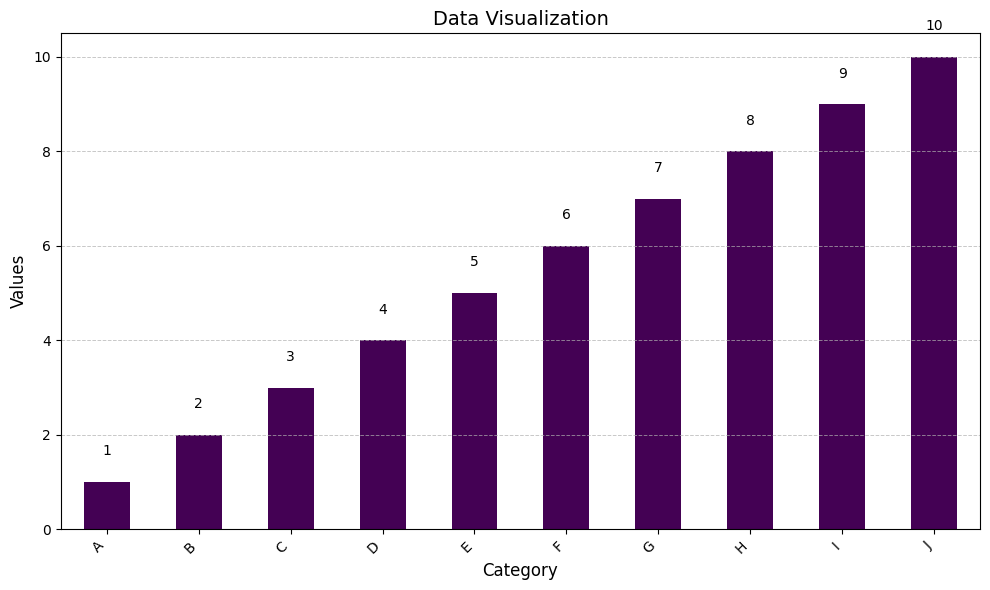

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Initializing the data
data_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# Basic data validation
if len(data_values) != len(categories):
    raise ValueError("The length of data values and categories must be the same.")

# Creating a DataFrame
df = pd.DataFrame({'Category': categories, 'Values': data_values})

# Documenting: Setting up the plot
plt.figure(figsize=(10, 6))  # Dynamically resizing the figure based on potential future data size

# Using pandas' built-in plotting
ax = df.plot.bar(x='Category', y='Values', legend=False, colormap='viridis', figsize=(10, 6))

# Enhanced visualization with annotations
for index, value in enumerate(data_values):
    ax.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Improved gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding titles and labels
plt.title('Data Visualization', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Error handling could be added in real-case scenarios
# try:
#     # code block where an error might occur
# except Exception as e:
#     print(f"An error occurred: {e}")

plt.xticks(rotation=45, horizontalalignment='right')  # Improve xticks readability by rotating
plt.tight_layout()  # Ensure everything fits into the plot area neatly

# Displaying the plot
plt.show()

## Code From Class Tests

INFO: Data points: [ 1  2  3  4  5  6  7  8  9 10]
INFO: Labels: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
INFO: Plotting complete.


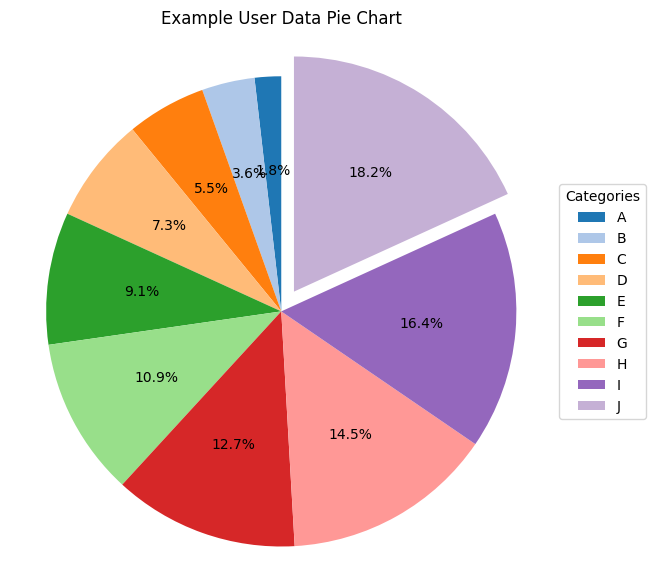

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

def validate_data(data_points, labels):
    """Validates the input data."""
    if not data_points or not labels:
        logging.error("The 'data' and 'column' lists must not be empty.")
        raise ValueError("The 'data' and 'column' lists must not be empty.")
    if len(data_points) != len(labels):
        logging.error("The 'data' and 'column' lists must be of the same length.")
        raise ValueError("The 'data' and 'column' lists must be of the same length.")
    if sum(data_points) == 0:
        logging.error("The sum of 'data' cannot be zero.")
        raise ValueError("The sum of 'data' cannot be zero.")

def plot_pie_chart(data_points, labels, figsize=(7, 7), startangle=90, color_map='tab20', title='Pie Chart'):
    """
    Plots a pie chart from data points and labels.

    Parameters:
    - data_points: List of numerical data points.
    - labels: List of corresponding labels for the data points.
    - figsize: Tuple specifying the size of the figure.
    - startangle: Starting angle of the pie chart.
    - color_map: Matplotlib color map for chart segments.
    - title: Title of the chart.
    """
    validate_data(data_points, labels)

    # Normalize data
    data_points = np.array(data_points)
    
    logging.info(f"Data points: {data_points}")
    logging.info(f"Labels: {labels}")

    # Define colors
    cmap = plt.get_cmap(color_map)
    colors = cmap(np.arange(len(data_points)))

    # Calculate explosion for the largest slices
    explode = [0.1 if x >= np.percentile(data_points, 90) else 0.0 for x in data_points]

    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(
        data_points, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        startangle=startangle, textprops=dict(color="w"))

    ax.axis('equal')  # Ensure a circular pie chart

    # Annotate segment with the largest values
    for i, a in enumerate(autotexts):
        a.set_color('black')
        a.set_fontsize(10)
    
    plt.title(title)
    plt.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    logging.info("Plotting complete.")
    plt.show()

# Execute the plotting function
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

try:
    plot_pie_chart(data, columns, title="Example User Data Pie Chart")
except Exception as e:
    logging.error(f"An error occurred: {e}")
